K-Means Clustering

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def indexing(X, G):
    K = G.shape[0]
    index = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        dists = [] 
        for j in range(G.shape[0]):
            dist = np.linalg.norm(X[i] - G[j])
            dists.append(dist)
        index[i] = np.argmin(dists)
    return index

In [3]:
def centroids(X, index, K):
    m, n = X.shape
    G = np.zeros((K, n))
    for k in range(K):   
        points = X[index == k]
        G[k] = np.mean(points, axis = 0)
    return G

In [4]:
def kmeans(X, K, num_iters):
    indices = np.random.permutation(X.shape[0])
    G = X[indices[:K]] 
    m, n = X.shape
    idx = np.zeros(m)
    for i in range(num_iters):
        index = indexing(X, G)
        G = centroids(X, index, K) 
    return G, index

In [135]:
def randpts(centre,r):
    x,y=centre[0],centre[1]
    pts=[]
    for i in range(1000):
        Pt=np.array([random.uniform(x-r,x+r),random.uniform(y-r,y+r)])
        if (np.linalg.norm(Pt - centre)<=r):
            pts.append(list(Pt))
        if (len(pts)==10):
            break
    return pts

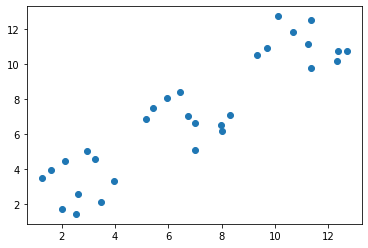

In [207]:
pts=randpts([3,3],2)+randpts([7,7],2)+randpts([11,11],2)
x=[]
y=[]
for i in range(30):
    x.append(pts[i][0])
    y.append(pts[i][1])
plt.scatter(x,y)

In [151]:
df = pd.DataFrame(pts, columns=['x', 'y'])
df.to_csv('clustering.csv', index=False)
df.head()

,x,y
0,3.319939,3.099588
1,4.121497,4.026660
2,4.518192,3.042002
3,3.052907,3.090191
4,4.567326,3.575462


In [174]:
X=np.array(pts)

<class 'numpy.ndarray'>


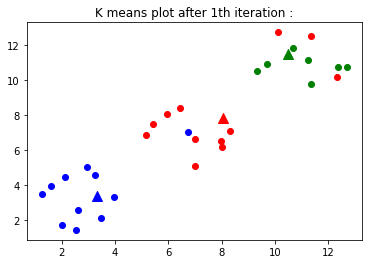

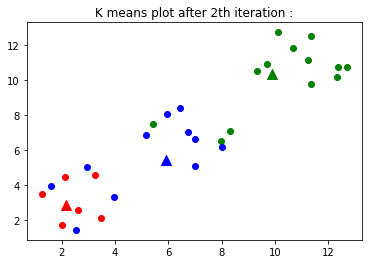

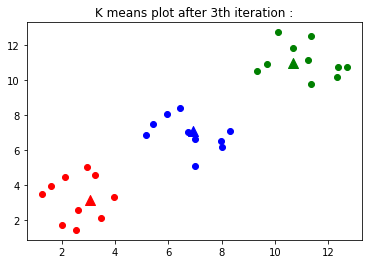

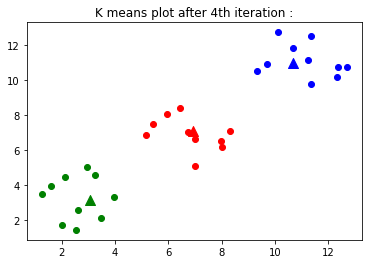

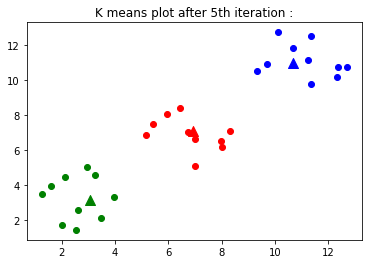

In [265]:
for i in range(1,6):
    G,index=kmeans(X, 3, i)
    Gx=[]
    Gy=[]
    for j in range(len(G)):
        Gx.append(G[j][0])
        Gy.append(G[j][1])
    plt.scatter(Gx[0],Gy[0],color="red",s=100, marker="^")
    plt.scatter(Gx[1],Gy[1],color="blue",s=100, marker="^")
    plt.scatter(Gx[2],Gy[2],color="green",s=100, marker="^")
    for j in range(30):
        if index[j]==0:
            plt.scatter(x[j],y[j],color='red') 
            
        elif index[j]==1:
            plt.scatter(x[j],y[j],color='blue')
            
        elif index[j]==2:
            plt.scatter(x[j],y[j],color='green')
    plt.title("K means plot after "+str(i)+"th iteration :")
    plt.show()            


In [242]:
def cost(X,K):
    m=len(X)
    G,index=kmeans(X, K, 4) 
    cost=0
    for i in range(m):
        if index[i]==0:
            cost+=np.linalg.norm(X[i] - G[0])
        elif index[i]==1:
            cost+=np.linalg.norm(X[i] - G[1])
        elif index[i]==2:
            cost+=np.linalg.norm(X[i] - G[2])
    return cost/m

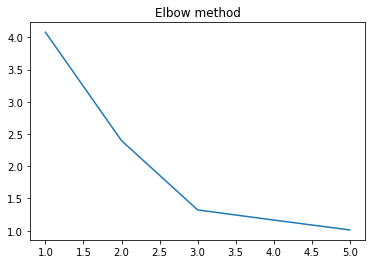

In [253]:
K=[1,2,3,4,5]
cost_list=[]
for i in range(1,6):
    cost_list.append(cost(X,i))
plt.title("Elbow method")    
plt.plot(K,cost_list)

The elbow method shows the 3 is the best fit for K. This can be intuitively said by the number of circle centres we used to create the data

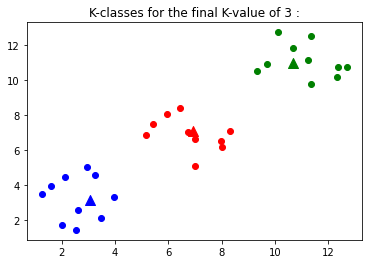

In [266]:
G,index=kmeans(X, 3, 3)
Gx=[]
Gy=[]
for j in range(len(G)):
    Gx.append(G[j][0])
    Gy.append(G[j][1])
plt.scatter(Gx[0],Gy[0],color="red",s=100, marker="^")
plt.scatter(Gx[1],Gy[1],color="blue",s=100, marker="^")
plt.scatter(Gx[2],Gy[2],color="green",s=100, marker="^")
for j in range(30):
    if index[j]==0:
        plt.scatter(x[j],y[j],color='red') 

    elif index[j]==1:
        plt.scatter(x[j],y[j],color='blue')

    elif index[j]==2:
        plt.scatter(x[j],y[j],color='green')
plt.title("K-classes for the final K-value of 3 :")
plt.show()